<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/22%20-%20Sklearn%20Pre-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 5.1 Traitement des données : Pre-processing

**Rappel du cours** (chapitre 5 : partie préparation des données)<br>
Avant de se lancer dans la mise en place d'un modèle d'apprentissage, il est nécessaire de comprendre le contenu du dataset et bien préparer les données : 
- *Anayse des données* :
  - Analyse de la forme : quelles sont les variables, les labels, taille du dataset, types de vriables, valeurs manquantes
  - Analyse du fond : visualiser quelques contenus, liens entre les variables, choix des variables, ...
  
- *Préparation des données* :
  - les algos d'apprentissage ne traitent que des valeurs numériques, sinon il fant encoder toutes les données non numériques vers des données numériques --> **encodage**
  - Les données peuvent avoir des échelles différentes, la phase de normalisation, ramener les valeurs entre 0 et 1 données doievt être numérique. --> **Normalisation**
  - le Dataset peut contenir des colnnes avec des valeurs inconnues (vides), il faut réparer --> **Imputation**  


## 1. Encodage
L'encodage est une phase importante dans la préparation des données. 
SkLearn sépare l'encodage des labels de celui des features: 
- LabelEncoder, LabelBinarizer pour les labels 
- et  plusieurs autres, dont OrdinalEncoder, OneHotEncoder, pour les fatutes.<br>

Les encodeurs sont proposés dans le Module  <span style="color:green;"> from sklearn.preprocessing</span> 
```
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
```

Utilisation assez simple :
- 1- choisir l'encodeur : ```encoder = LabelEncoder() ou / OrdinalEncoder()``` en fonction de X ou y
- 2- appeler le transformer :  ```encoder.fit_transform(y)```


In [28]:
## Import de tous les modules utilees pour le préprocessing des données
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

### Encodage de Labels : LabelEncoder et  LabelBinarizer


In [29]:
# Le label encoder est spécfique au label, ne jamais utiliser pour les X.
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [30]:
# On peut passer des valeurs vers les vrais labels.
encoder.inverse_transform(np.array([0, 0, 2]))

array(['chat', 'chat', 'oiseau'], dtype='<U6')

In [31]:
# représentation binaire des labels 
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

### Encodage Ordinal et Encodage OneHot
Associe des entiers à des strings.

In [32]:
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

La représentation oneHot (on la verra plus en détail dans le cours sur le deep learning) consiste à représenter les données sous forme vectorielle dans l'espace vectoriel engendré par tout le vocbulaire du "feature" concerné.
Par exemple si un feature comporte 10 mots (données) différents, chaque mot du vocabulaire représente une coordonnée dans l'espace vectoriel.

In [33]:
### Voici un exemple de OneHot
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(X)

C:\Users\Baran\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

## Encodage Données ?
Ecrire le code qui permet d'encoder la colonne Sex du fichier Titanic.
Et les labels du dataset iris.

In [34]:
import pandas as pd

In [56]:
## Encodage Données ?
#Ecrire le code qui permet d'encoder la colonne Sex du fichier Titanic.
#Et les labels du dataset iris.

titanic = pd.read_csv("https://github.com/datasciencedojo/datasets/blob/master/titanic.csv?raw=true") # raw signifie que l'on veut le fichier brut
#titanic.head()

iris = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv?raw=true")
#encodage colonne sex de titanic
encoder = LabelEncoder()
titanic["Sex"] = encoder.fit_transform(titanic["Sex"])

iris["variety"] = encoder.fit_transform(iris["variety"])
print(iris["variety"].unique())


[0 1 2]



## 2. Normalisation
La normalisation est fondamentale en machine learning.
**from sklearn.preprocessing** propose plusieurs classes (**MinMaxScaler, StandardScaler, RobustScaler**).
 La normalisation, d'ailleurs comme l'encodage,  s'effectuer en appelant la méthode **fit_transform()** de la classe choisie.

In [36]:
# Appel des trois classes de normalisation que nous allons exploiter.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [61]:
X = np.random.randint(0, 100, [10, 1]) # 
#normaliser les données avec la fonction MinMaxScaler
#normaliser les données

mean = X.mean()
std = X.std()
X_norm = (X - mean) / std
print(X_norm)

#calcul du min manuelement
xmin = -1
for (i, x) in enumerate(X):
    if i == 0:
        xmin = x
    else:
        if x < xmin:
            xmin = x

print(xmin,X.min())

    

[[-0.89443562]
 [-1.2707354 ]
 [ 0.95811712]
 [-0.02605152]
 [-0.9523279 ]
 [ 1.21863235]
 [-0.4023513 ]
 [ 1.18968622]
 [ 1.24757849]
 [-1.06811244]]
[8] 8


#### MinMaxScaler


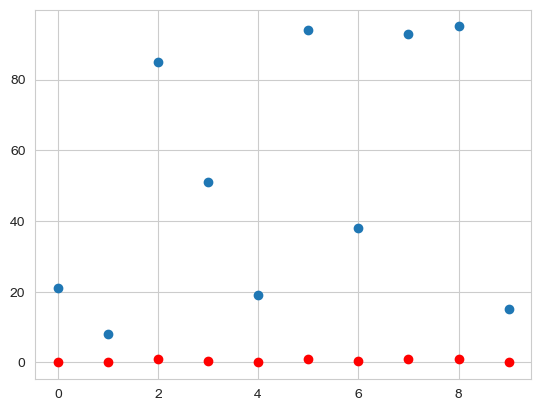

In [62]:
X_minmax = MinMaxScaler().fit_transform(X)
# minmax scaler sert a normaliser les données 
#la méthode c'est de soustraire la valeur min et diviser par la différence entre max et min soit (x - min) / (max - min)
plt.scatter(range(len(X)), X)
plt.scatter(range(len(X)), X_minmax , c="red")

#### StandardScaler

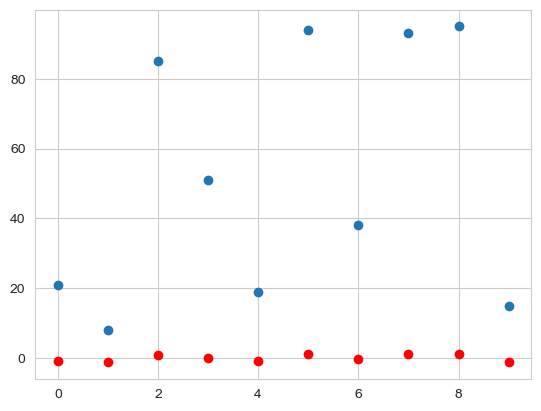

In [63]:
X_stdscl = StandardScaler().fit_transform(X)
#standard scaler sert a normaliser les données
plt.scatter(range(len(X)), X)
plt.scatter(range(len(X)), X_stdscl , c="red")
     
#plt.scatter(X[:, 2], X[:, 3])
#plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], c="red")

#### RobustScaler
très êu sensible aux outliers 

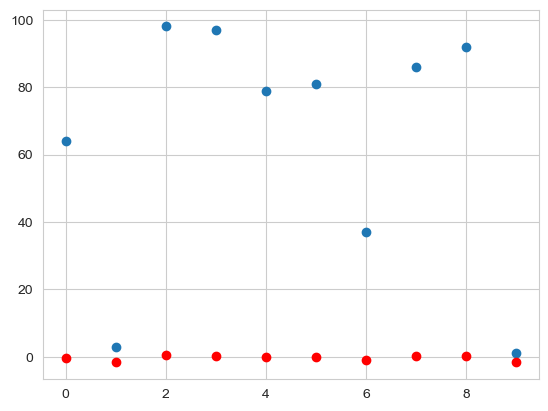

In [40]:
X_robust = RobustScaler().fit_transform(X)
plt.scatter(range(len(X)), X)
plt.scatter(range(len(X)), X_robust , c="red")
# robust scaler sert a normaliser les données
# la méthode de robustscaler est de soustraire la médiane et diviser par l'écart interquartile soit (x - médiane) / (Q3 - Q1)
#plt.scatter(X[:, 2], X[:, 3])
#plt.scatter(X_robust[:, 2], X_robust[:, 3], c="red")

#### Question :
Ecrire vos propres fonctions qui permettent de coder les deux normalisations : Minmax et la Satndardisation (Utiliser, les fonctions min, max, ecart type et variance) de numpy. 

## 3. Discretisation
Ce tranformer permet de discrétiser (convertir/découper) une liste de valeurs vers une liste de catégories. Il existe deux transformers : 
- Binarizer (binarisation) deux valeurs possibles 1 ou 0: il convertit une liste valeurs vers $0$ ou $1$ en fonction d'un seuil. 
    - Exemple : 5 valeurs, 1,3,5,6,7, à partager dans deux catéories $0$ ou $1$, avec un seuil de $4$. $ toutes celles qui sont inéfereures $<seuil$ (soient 1 et 3) auront 0 et les autres 1 
- KBinsDiscretizer : permet de faire la même chose, mais la liste est découpée en plusieurs catégories **KBinsDiscretizer(n_bins=6)**

In [64]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [65]:
X = np.linspace(0, 5, 10).reshape((10, 1))

In [66]:
Binarizer(threshold=3).fit_transform(X)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [67]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [45]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier, LogisticRegression

## 4. Traitement des valeurs manquantes

#### SimpleImputer

Permet de remplacer les valeurs manquantes, listées dans **missing_values**  par une autre valeur définie dans **strategy**.
Il offre différentes stratégies, notamment le remplacement des valeurs manquantes par la moyenne, la médiane, la valeur fréquente ou une valeur constante. 
```missing values``` : permet d'indiquer les valeurs manquantes par exemple "np.nan", valeurs négatives.
```srategy``` : choisir la stragétie pour remplacer ces valeurs.


In [68]:
from sklearn.impute import SimpleImputer

In [69]:
X = np.array([[10, 3],
              [0, 4],
              [5, 3],
             [np.nan, 3]])

# Définition d'un Imputer pour les valeurs qui manque : ici  nan, puis on définit une stratégie remplacer par la moyenne
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

In [70]:
X_test = np.array([[12, 5],
                   [40, 2],
                   [5, 5],
                   [np.nan, np.nan]])
imputer.transform(X_test)

array([[12.  ,  5.  ],
       [40.  ,  2.  ],
       [ 5.  ,  5.  ],
       [ 5.  ,  3.25]])

#### KNNImputer
Ramplace les valeurs manquantes par les valeurs du (ou des) voisins(s) le(s) plus proche

In [71]:
from sklearn.impute import KNNImputer

In [72]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X) #KNNImputer sert a remplacer les valeurs manquantes par les valeurs du (ou des) voisins(s) le(s) plus proche

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,  20.]])

In [73]:
X_test = np.array([[np.nan, 35]])
imputer.transform(X_test)

array([[ 2., 35.]])